# Imports

In [12]:
import pandas as pd 
import seaborn as sns
import matplotlib as plt
from IPython.display import display


# Analyzing Errors

Analyzing the notebooks that ran into various errors while the script was executing (`github2017-sixth-errors.csv`)

## Loading the .csv file

In [3]:
errors_filepath = 'github2017-sixth-errors.csv'
errors_df = pd.read_csv(errors_filepath)

# initial look at the data
errors_df.head()

,nb_id,repo_id,err_in
0,408548,93282436,api
1,484614,95004508,no_code
2,806977,93647670,api
3,160930,29998194,api
4,964194,72123088,api


## Plotting the error data

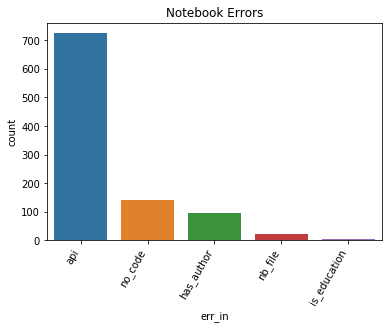

In [5]:
# create a bar plot of the errors column
error_plot = sns.countplot(x='err_in', data=errors_df)

# fix the appearance of the bar plot
temp = error_plot.set_xticklabels(error_plot.get_xticklabels(), rotation=60, ha="right")
temp = error_plot.set(title = "Notebook Errors")

The top four errors (`api`, `no_code`, `has_author`, and `nb_file`) have similar numbers to the previous complete run. 

The `is_education` errors were caused by a bug (fixed) in the script, which didn't check for the `source` field in a markdown cell before accessing it.

# Analyzing Adjusted Features

Analyzing the data obtained from running improved feature scripts on the dataset (`github2017-sixth-run.csv`) and comparing those results with previous runs of those feature scripts (`github2017-third-run.csv`)

## Loading the .csv files

In [7]:
results_filepath = 'github2017-sixth-run.csv'
results_df = pd.read_csv(results_filepath)

# initial look at the data
results_df.head()

,nb_id,repo_id,longer_beginning,longer_ending,has_author,is_education,language,has_links,has_comments
0,900493,85972539,NaN,NaN,False,False,python,NaN,False
1,322852,45655960,False,False,False,False,python,False,False
2,457759,27685708,True,False,False,False,python,False,False
3,672138,92749043,False,False,False,False,python,True,True
4,103154,30734070,False,False,False,False,python,False,False


In [9]:
old_results_filepath = '../third-run/github2017-third-run.csv'
old_results_df = pd.read_csv(old_results_filepath)

# initial look at the old data
old_results_df.head()

,nb_id,repo_id,longer_beginning,longer_ending,has_author,has_equation,jupyter_prop,output_cell_prop,markdown_prop,num_contrib,image_prop,e_keywords,p_keywords,s_keywords,is_education,language
0,900493,85972539,NaN,NaN,False,NaN,0.991818,0.400000,0.000000,3,0.500000,0.0,0.0,0.0,False,python
1,322852,45655960,False,False,False,False,0.029944,0.000000,0.400000,2,NaN,0.0,1.0,0.0,False,python
2,457759,27685708,True,False,False,False,NaN,0.666667,0.250000,1,1.000000,0.0,0.0,1.0,False,python
3,672138,92749043,True,False,False,False,1.000000,0.695652,0.080000,1,0.312500,0.0,0.0,0.0,False,python
4,103154,30734070,False,False,False,False,NaN,0.638393,0.257426,1,0.006993,1.0,0.0,0.0,False,python


The features that were adjusted and whose data will be compared against the third run are:

- `longer_beginning`: changed to count words instead of characters, and links/equations counted as one word
- `longer_ending`: same as above
- `has_author`: now only checks the markdown cells and code comments for instances of author names
- `is_education`: changes lines to lower case, then checks them against patterns
- `language`: if language was not found in the `kernelspec`, then take the name of the `kernelspec` as a fallback

## Plotting, Cleaning, and Comparing the Data

In [14]:
def clean_column(field, df):
    
    # isolate the right columns
    original = df[['nb_id', 'repo_id', field]]
    
    # filter out the NaN rows
    clean = original.dropna(subset = [field])
    
    # return the cleaned column
    return clean

### Longer Markdown Cells at the Beginning/End

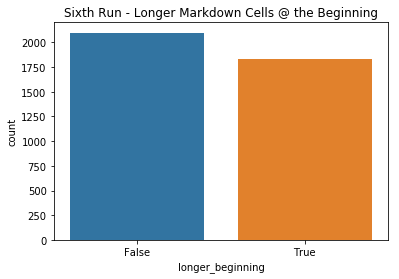

In [33]:
# clean the data
longer_beginning = clean_column('longer_beginning', results_df)

# plot the data
beginning_plot = sns.countplot(x='longer_beginning', data=longer_beginning)

# fix appearance
temp = beginning_plot.set(title = "Sixth Run - Longer Markdown Cells @ the Beginning")

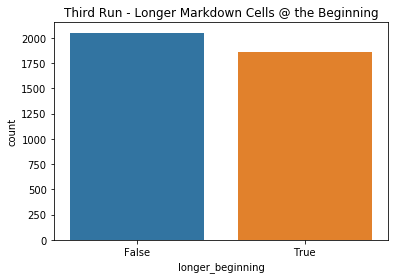

In [21]:
# repeat the same for old results
longer_beginning_old = clean_column('longer_beginning', old_results_df)
beginning_old_plot = sns.countplot(x='longer_beginning',data=longer_beginning_old)
temp = beginning_old_plot.set(title = "Third Run - Longer Markdown Cells @ the Beginning")

The plots don't show any difference, so we instead generate a table of counts. In any case, it seems that there was no significant difference between the new and old data, so changing the script did not do much. 

In [41]:
# count the number of trues for both runs
longer_beginning_count = len(results_df[results_df.longer_beginning == True])
longer_beginning_count_old = len(old_results_df[old_results_df.longer_beginning == True])

print("Sixth Run - " + str(longer_beginning_count))
print("Third Run - " + str(longer_beginning_count_old))

Sixth Run - 1828
Third Run - 1864


The sixth run categorized slightly less notebooks as having a longer markdown cell in the beginning of the notebook

**Note (TODO): extract and verify the notebooks for which the output differed between the two runs**

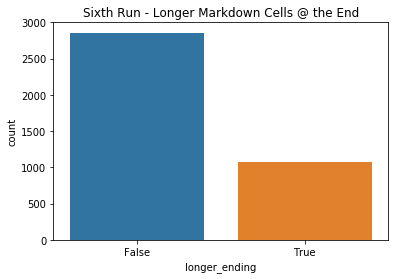

In [34]:
# clean the data
longer_ending = clean_column('longer_ending', results_df)

# plot the data
ending_plot = sns.countplot(x='longer_ending', data=longer_ending)

# fix appearance
temp = ending_plot.set(title = "Sixth Run - Longer Markdown Cells @ the End")

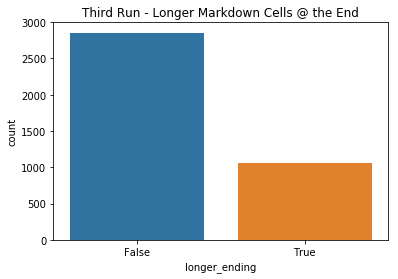

In [36]:
# repeat the same for old results
longer_ending_old = clean_column('longer_ending', old_results_df)
ending_old_plot = sns.countplot(x='longer_ending',data=longer_ending_old)
temp = ending_old_plot.set(title = "Third Run - Longer Markdown Cells @ the End")

In [40]:
# count the number of trues for both runs
longer_ending_count = len(results_df[results_df.longer_ending == True])
longer_ending_count_old = len(old_results_df[old_results_df.longer_ending == True])

print("Sixth Run - " + str(longer_ending_count))
print("Third Run - " + str(longer_ending_count_old))

Sixth Run - 1070
Third Run - 1061


The sixth run categorized very slightly more notebooks as having a longer markdown cell at the end of the notebook.

**Note (TODO): same as above, extract and verify the differences**

### Author Detection

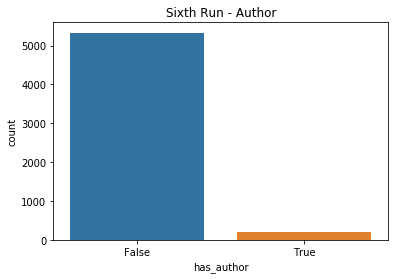

In [38]:
# clean the data
has_author = clean_column('has_author', results_df)

# plot the data
has_author_plot = sns.countplot(x='has_author', data=has_author)

# fix appearance
temp = has_author_plot.set(title = "Sixth Run - Author")

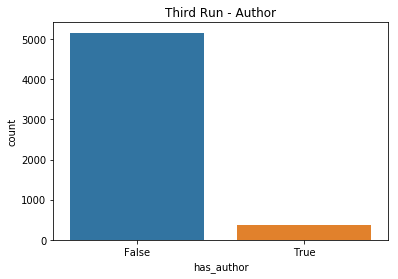

In [39]:
# repeat the same for old results
has_author_old = clean_column('has_author', old_results_df)
has_author_old_plot = sns.countplot(x='has_author',data=has_author_old)
temp = has_author_old_plot.set(title = "Third Run - Author")

The sixth run categorized less notebooks as having an author; this makes sense, since many false positives were detected in the old results as usernames were being detected in links and filepaths.

### Educational Notebooks

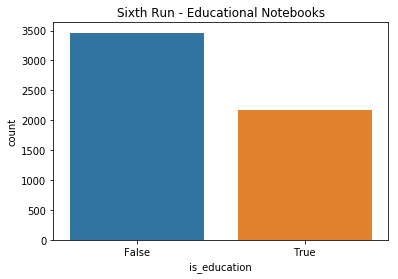

In [42]:
# clean the data
is_education = clean_column('is_education', results_df)

# plot the data
is_education_plot = sns.countplot(x='is_education', data=is_education)

# fix appearance
temp = is_education_plot.set(title = "Sixth Run - Educational Notebooks")

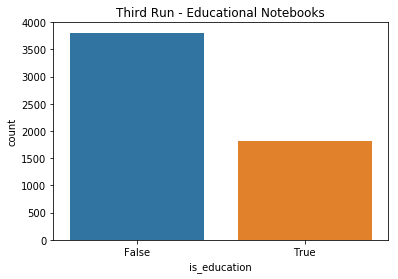

In [43]:
# repeat the same for old results
is_education_old = clean_column('is_education', old_results_df)
is_education_old_plot = sns.countplot(x='is_education',data=is_education_old)
temp = is_education_old_plot.set(title = "Third Run - Educational Notebooks")

The sixth run categorized more notebooks as having an educational purpose; this makes sense, since the script was adjusted to be case insensitive when checking for educational keywords.

### Language

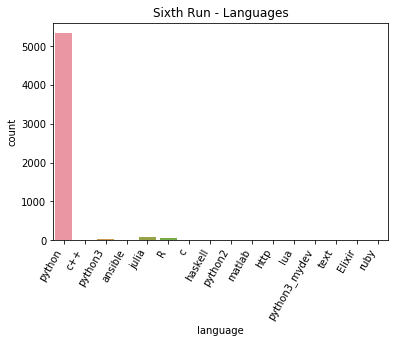

In [47]:
# clean the data
languages = clean_column('language', results_df)

# create a bar plot of the languages column
languages_plot = sns.countplot(x='language', data=languages)

# fix the appearance of the bar plot 
temp = languages_plot.set_xticklabels(languages_plot.get_xticklabels(), rotation=60, ha="right")
temp = languages_plot.set(title = "Sixth Run - Languages")

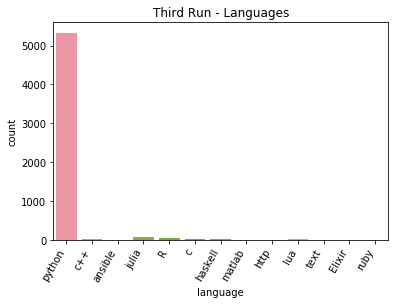

In [48]:
# repeat the same for old results
languages_old = clean_column('language', old_results_df)
languages_old_plot = sns.countplot(x='language', data=languages_old)
temp = languages_old_plot.set_xticklabels(languages_old_plot.get_xticklabels(), rotation=60, ha="right")
temp = languages_old_plot.set(title = "Third Run - Languages")

We can see the results of using the `name` of the `kernelspec` as a fallback: we're getting "duplicate" results, notably `python`, `python2`, `python3`, and `python3_mydev`. 

If we end up filtering out the Python notebooks in the future, it will be important to include these notebooks.

# Analyzing New Features

Analyzing the data obtained from running the new feature scripts on the dataset (`github2017-sixth-run.csv)

## Loading the .csv file

The `.csv` file was already loaded in the previous section, so we simply take an initial look at the data again

In [45]:
results_df.head()

,nb_id,repo_id,longer_beginning,longer_ending,has_author,is_education,language,has_links,has_comments
0,900493,85972539,NaN,NaN,False,False,python,NaN,False
1,322852,45655960,False,False,False,False,python,False,False
2,457759,27685708,True,False,False,False,python,False,False
3,672138,92749043,False,False,False,False,python,True,True
4,103154,30734070,False,False,False,False,python,False,False


The new features for this run are:

- `has_links`: uses a regex to detect links in markdown cells
- `has_comments`: (only for python notebooks) uses a comment parser to see if the code has comments

## Plotting and Cleaning the Data

### Links

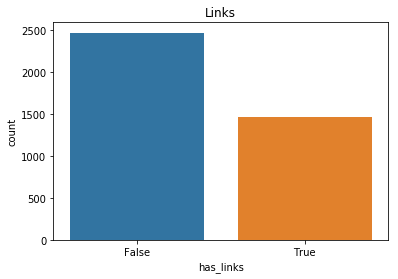

In [50]:
# clean the data
has_links = clean_column('has_links', results_df)

# plot the data
has_links_plot = sns.countplot(x='has_links', data=has_links)

# fix appearance
temp = has_links_plot.set(title = "Links")

### Comments

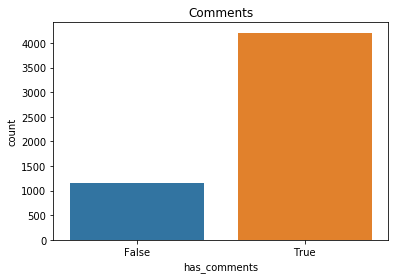

In [51]:
# clean the data
has_comments = clean_column('has_comments', results_df)

# plot the data
has_comments_plot = sns.countplot(x='has_comments', data=has_comments)

# fix appearance
temp = has_comments_plot.set(title = "Comments")

The majority of notebooks did have comments in their code. However, whether these comments are descriptive or just commented-out code is not known at this point; the next run should test a feature that detects commented-out code.

**Note (TODO): once the script to detect commented-out code is ready, see how many of these notebooks with comments only have commented-out code, and no descriptive code comments**